# CS5062_ASSESSMENT1_ZHIXI_TANG__52097136

Student: ZHIXI TANG
Student ID: 52097136

## Introduction

This .ipynb file include the source code and detailed explanation of CS5062 Assessment 1. It can be run on local machine with
required environment or Google Colab.

**Run on local machine:**

* System:
* Python Version:
* IDE: Pycharm:
* Required packages: see `requirements.txt` or use command `$ pip install -r requirements.txt`

**Run on Colab:**

Simply uploading this .ipynb file on Google Colab then feel free to play it.

## Task 1

### Task 1 - A: Data Import

We will use `pandas` to read the .csv data file as the following:

In [ ]:
import pandas as pd
import numpy as np
import torch

df = pd.read_csv('./data/soybean_tabular.csv')
df

,Variety,S_1,S_2,S_3,S_4,M_1,M_2,M_3,W_1,W_2,W_3,W_4,Yield
0,1,4.0900,15.3,396.90,4.98,0.00632,18.0,6.575,2.381979,0.475522,65.2,296.350195,24.0
1,2,4.9671,17.8,396.90,9.14,0.02731,0.0,6.421,7.071148,0.509165,78.9,241.620198,21.6
2,2,4.9671,17.8,392.83,4.03,0.02729,0.0,7.185,6.896941,0.580673,61.1,241.551476,34.7
3,3,6.0622,18.7,394.63,2.94,0.03237,0.0,6.998,2.237817,0.491539,45.8,222.023994,33.4
4,3,6.0622,18.7,396.90,5.33,0.06905,0.0,7.147,1.979327,0.103660,54.2,221.723972,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1,2.4786,21.0,391.99,9.67,0.06263,0.0,6.593,11.774062,0.565469,69.1,272.952382,22.4
502,1,2.2875,21.0,396.90,9.08,0.04527,0.0,6.120,11.785249,0.562102,76.7,273.264306,20.6
503,1,2.1675,21.0,396.90,5.64,0.06076,0.0,6.976,11.854205,0.777569,91.0,273.421726,23.9
504,1,2.3889,21.0,393.45,6.48,0.10959,0.0,6.794,11.765196,0.679057,89.3,273.913622,22.0


Similarly, we use `pandas` to get the statistical summary infomation (mean, range, standard deviations, min/max, median, and 25%/50%/75% percentile).

In [ ]:
df1 = df.iloc[:, 1:]

# range
df1.describe()

,S_1,S_2,S_3,S_4,M_1,M_2,M_3,W_1,W_2,W_3,W_4,Yield
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.795043,18.455534,356.674032,12.653063,3.613524,11.363636,6.284634,11.131488,0.551258,68.574901,408.252839,22.532806
std,2.105710,2.164946,91.294864,7.141062,8.601545,23.322453,0.702617,6.868654,0.181693,28.148861,168.530578,9.197104
min,1.129600,12.600000,0.320000,1.730000,0.006320,0.000000,3.561000,0.472905,0.103660,2.900000,186.765075,5.000000
25%,2.100175,17.400000,375.377500,6.950000,0.082045,0.000000,5.885500,5.149096,0.422286,45.025000,278.745884,17.025000
50%,3.207450,19.050000,391.440000,11.360000,0.256510,0.000000,6.208500,9.588040,0.528133,77.500000,330.467783,21.200000
75%,5.188425,20.200000,396.225000,16.955000,3.677082,12.500000,6.623500,18.094315,0.668573,94.075000,665.354401,25.000000
max,12.126500,22.000000,396.900000,37.970000,88.976200,100.000000,8.780000,28.074197,1.158538,100.000000,711.210992,50.000000


The statistical description is shown above. As the feature `variety` is just a number to represent corp variety, we do not
have to count its means, std, min, etc.

From the above data we can see in the column `M_2`, there are some values are missed. The dataset has used $0$ to replace
these missed values.

However, to a certain variety of crops, there maybe a certain result corresponding to its features and yield,
therefore, we will get the statistical description of different varieties of corps separately.

In [ ]:
# count how many varieties in corps
df['Variety'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: Variety, dtype: int64

In [ ]:
def show_describe(dataframe, variety_num):
    """"The variety_num can only be one of [24, 5, 4, 3, 6, 2, 8, 1, 7]"""
    df_v = dataframe.loc[dataframe['Variety'] == variety_num]
    return  df_v.describe()

In [ ]:
def DiffYield(dataframe):
    """Input the table of .csv, return the summary of yeild based on different variety"""
    varieties = [24, 5, 4, 3, 6, 2, 8, 1, 7]
    index = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']
    v_names = []
    data = {}

    for i in varieties:
        df_v = show_describe(dataframe, i)  # get the describe info of a single variety
        corp_yield = df_v.iloc[1:, -1].values
        exec(f"data['Variety_{i}'] = corp_yield")
    yield_df = pd.DataFrame(data, index=index)

    return yield_df

In [ ]:
# df.iloc[1:, -1]
df.iloc[1:, -1].index

RangeIndex(start=1, stop=506, step=1)

In [ ]:
DiffYield(df)

,Variety_24,Variety_5,Variety_4,Variety_3,Variety_6,Variety_2,Variety_8,Variety_1,Variety_7
mean,16.403788,25.706957,21.387273,27.928947,20.976923,26.833333,30.358333,24.365000,27.105882
std,8.539745,9.328401,6.957883,8.324692,2.312801,7.874376,9.727724,8.024454,6.493215
min,5.000000,11.800000,7.000000,14.400000,16.800000,15.700000,16.000000,11.900000,17.600000
25%,11.225000,19.500000,17.575000,21.125000,18.900000,21.400000,23.825000,20.475000,24.300000
50%,14.400000,23.000000,20.450000,26.500000,21.200000,23.850000,28.250000,22.200000,26.200000
75%,19.900000,30.000000,23.650000,34.525000,23.025000,33.225000,33.175000,27.225000,29.600000
max,50.000000,50.000000,50.000000,50.000000,24.800000,43.800000,50.000000,50.000000,42.800000


From above table we can tell that to different varieties of corps, the yield is also different. For example, The Max yield of
`Variety_6` is just 24.8 which is much lower than other varieties. According to the mean of `variety_24`, we can tell its average
yield is much lower than other varieties. Therefore, we can conclude that the variety of corps affects its yield.

### Task 1 - B: Data pre-processing

In this section, we will split dataset to train, validation, test with rate of 6:2:2. At the same time, we will try our
best to ensure the fairness and uniformity of data. According to the conclusion of `Task 1 - A`, we know that the variety
of corps affects its yield. Therefore, we will take samples from each variety at a ratio of $6:2:2$ (train:validation:test),
and then compose the datasets. In this case, we can assure as much as possible that in each set of data, the variety proportions of
corps are approximately equal.

In [ ]:
from sklearn.preprocessing import StandardScaler

def extract_df_by_variety(dataframe):
    """Split dataframe based on varieties, return all dataframes with dictionary"""
    varieties = [24, 5, 4, 3, 6, 2, 8, 1, 7]
    extracted_df = {}
    for variety in varieties:
        df_s = dataframe.loc[dataframe['Variety'] == variety]
        # exec(f"extracted_df['Variety_{variety}'] = df_s")
        extracted_df[variety] = df_s
    return extracted_df

def split_single_dataset(dataframe):
    """split particular dataset to train:val:test = 6:2:2"""
    train_set = dataframe.sample(frac=0.6, random_state=0, axis=0)
    rest_set = dataframe[~dataframe.index.isin(train_set.index)]
    test_set = rest_set.sample(frac=0.5, random_state=0, axis=0)
    val_set = rest_set[~rest_set.index.isin(test_set.index)]

    return train_set, test_set, val_set

def stratified_sampling(dataframe):
    """"Combine above functions, input the dataframe, return the stratified sampled datasets"""
    extracted_dfs = extract_df_by_variety(dataframe)
    train_sets, test_sets, val_sets = [], [], []
    for _df in extracted_dfs.values():
        train_set, test_set, val_set = split_single_dataset(_df)
        train_sets.append(train_set)
        test_sets.append(test_set)
        val_sets.append(val_set)
    p_train = np.array(pd.concat(train_sets).sample(frac=1), dtype='float32')
    p_test = np.array(pd.concat(test_sets).sample(frac=1), dtype='float32')
    p_val = np.array(pd.concat(val_sets).sample(frac=1), dtype='float32')

    return p_train, p_test, p_val


In [ ]:
# get train, validation, test datasets
train_set, test_set, val_set = stratified_sampling(df)

In [ ]:
def tensor_generator(dataset):
    """input stratified sampled dataset, return variable x and result y"""
    x = torch.tensor(dataset[...,:12])
    y = torch.tensor(dataset[...,12:])
    return x, y

In [ ]:
# get tensors

x_train, y_train = tensor_generator(train_set)
x_val, y_val = tensor_generator(val_set)
x_test, y_test = tensor_generator(test_set)

x_train

tensor([[6.0000e+00, 2.8927e+00, 1.9200e+01,  ..., 4.5895e-01, 7.0600e+01,
         3.9106e+02],
        [5.0000e+00, 1.4191e+00, 1.4700e+01,  ..., 9.5758e-01, 1.0000e+02,
         4.0364e+02],
        [2.4000e+01, 1.6475e+00, 2.0200e+01,  ..., 4.9562e-01, 8.9100e+01,
         6.6605e+02],
        ...,
        [2.0000e+00, 1.9929e+00, 1.9100e+01,  ..., 4.5043e-01, 8.8400e+01,
         1.8773e+02],
        [2.4000e+01, 1.6768e+00, 2.0200e+01,  ..., 6.9845e-01, 9.6000e+01,
         6.6531e+02],
        [2.0000e+00, 2.1974e+00, 1.9100e+01,  ..., 2.9167e-01, 8.4100e+01,
         1.8753e+02]])

According to the first table shown in `Task 1 - A`, we can tell that the values of different features have observable difference, for example,
in the first example, the value of feature `S_3` is 369.90, the value of feature `W_2` is 0.475522. To eliminate the gradient descent majorly
depends on some features, we will do z-score normalization to the variable $X$. As we know, the formula of z-score is: $\hat X = \frac{X-\mu}{\epsilon}$,
where $\hat X$ is the normalized variable $X$, $\mu$ is the mean of $X$, $\epsilon$ is the standard deviation of $X$. Therefore, we can define
function as the following.

In [ ]:
# def normalization(dataframe, columns):
#     sc_set = StandardScaler().fit_transform(dataframe)
#     return pd.DataFrame(data=sc_set, columns=columns)
def normalization_x(x, y):
    """Input a tensor, return the z-score normalized tensor"""
    mean = torch.mean(x)
    std = torch.std(x)
    normed_x = (x - mean) / std
    normed_y = (y - mean) / std
    return normed_x, normed_y

# normalize X
normed_x_train, normed_y_train = normalization_x(x_train, y_train)
normed_x_val, normed_y_val = normalization_x(x_val, y_val)
normed_x_test, normed_y_test = normalization_x(x_test, y_test)

### Task 1 - C: Linear Regression Training

In this section we will define the Linear models and fit them with PyTorch. According to the requirements of task. We will create two linear models. One is Ridge regression, the other one is Lasso regression. 

During the traininig process, we will count the mean square error for the training set and validation set. Then we choose the best performance model according to these observed values.

In fact, Edge regression and Lasso regression is L2 and L1 optimization in Linear regression. 

The essence of L1 optimization is adding a $\frac{1}{2}\lambda\omega^2$ to every $\omega$ of the function($\frac{1}{2}\lambda||W||^2 = \frac{1}{2}\sum_j \omega^2_j$). Therefore, to define L1 optimization, we will re-write the calculation process of loss function during train process. 

To define the Edge regression, L2 regularization means that all $\omega$ decrease linearly toward 0 with $\omega += -\lambda * W$. Fortunately, in PyTorch, the optimizer has parameter `weight_decay(float, optional)`, when this parameter is not equal to 0, it is L2 regularizaiton.

Therefore, we can define `edge_linear` and `lasso_linear` to train our model as below. 

The initial hyperparameters will be set as the following, then we will try to find the optimal hyperparameters after the first trains. 

* lr(learning rate/step size) = 0.001
* epoch = 10000
* L1/L2 lambda = 0.001

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

def edge_linear(x_train, y_train, x_val, y_val, epoch, p_step=10, lr=0.01, save_model=False, gpu=False, vis=False, lambda_L=0):
    """Edge regression"""

    model = torch.nn.Linear(12, 1, bias=True)  # define Linear model
    loss_func = torch.nn.MSELoss()  # define loss function
    optim = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=lambda_L)  # define optimizer
    loss_history = []
    loss_val_history = []
    if gpu:
        model = model.cuda(0)
        x_train = x_train.cuda(0)
        y_train = y_train.cuda(0)
        x_val = x_val.cuda(0)
        y_val = y_val.cuda(0)

    print('iter,\ttrain_loss,\tval_loss')

    for i in range(epoch):
        """Train process"""
        y_hat = model(x_train)
        loss = loss_func(y_hat, y_train)
        loss_history.append(loss)
        optim.zero_grad()
        loss.backward()
        optim.step()
        # print(model.weight.detach().numpy())
        """validation process"""
        y_val_hat = model(x_val)
        loss_val = loss_func(y_val_hat, y_val)
        loss_val_history.append(loss_val)
        # print(model.weight.detach().numpy())
        """print the train loss and validation loss"""
        if i % p_step == 0 or i==epoch-1:
            print(f'{i}\t{loss.item():.4f}\t\t{loss_val.item():.4f}')
    if save_model:
        torch.save(model, './EdgeLinear.pth')
    if vis:
        x_1 = loss_history
        x_2 = loss_val_history
        y = range(epoch)
        plt.plot(y, x_1, label="train loss")
        plt.plot(y, x_2, label="val loss")
        plt.xlabel("epoch")
        plt.ylabel("loss value")
        plt.title("Loss Values")
        plt.legend()

In [ ]:
def lasso_linear(x_train, y_train, x_val, y_val, epoch, p_step=10, lr=0.001, save_model=False, gpu=False, vis=False, lambda_L=0):
    """Lasso regression"""
    model = torch.nn.Linear(12, 1, bias=True)  # define Linear model
    loss_func = torch.nn.MSELoss()  # define loss function
    optim = torch.optim.SGD(model.parameters(), lr=lr)  # define optimizer
    loss_history = []
    loss_val_history = []
    if gpu:
        model = model.cuda(0)
        x_train = x_train.cuda(0)
        y_train = y_train.cuda(0)
        x_val = x_val.cuda(0)
        y_val = y_val.cuda(0)
    print('iter,\ttrain_loss,\tval_loss')

    for i in range(epoch):
        """Train process"""
        w = 0
        for param in model.parameters():
            w += torch.sum(abs(param))
        y_hat = model(x_train)
        loss = loss_func(y_hat, y_train) + lambda_L * w
        loss_history.append(loss.item())
        optim.zero_grad()
        loss.backward()
        optim.step()
        # print(model.weight.detach().numpy())
        """validation process"""
        y_val_hat = model(x_val)
        loss_val = loss_func(y_val_hat, y_val)
        loss_val_history.append(loss_val.item())
        # print(model.weight.detach().numpy())
        """print the train loss and validation loss"""
        if i % p_step == 0 or i==epoch-1:
            print(f'{i}\t{loss.item():.4f}\t\t{loss_val.item():.4f}')
    if save_model:
        torch.save(model, './LassoLinear.pth')
    if vis:
        x_1 = loss_history
        x_2 = loss_val_history
        y = range(epoch)
        plt.plot(y, x_1, label="train loss")
        plt.plot(y, x_2, label="val loss")
        plt.xlabel("epoch")
        plt.ylabel("loss value")
        plt.title("Loss Values")
        plt.legend()

iter,	train_loss,	val_loss
0	0.9173		0.8430
500	0.0229		0.0235
1000	0.0095		0.0108
1500	0.0075		0.0090
2000	0.0069		0.0083
2500	0.0064		0.0078
3000	0.0060		0.0073
3500	0.0057		0.0068
4000	0.0054		0.0065
4500	0.0051		0.0061
5000	0.0049		0.0058
5500	0.0047		0.0056
6000	0.0045		0.0053
6500	0.0043		0.0051
7000	0.0042		0.0050
7500	0.0041		0.0048
8000	0.0040		0.0047
8500	0.0039		0.0045
9000	0.0038		0.0044
9500	0.0037		0.0043
9999	0.0036		0.0042


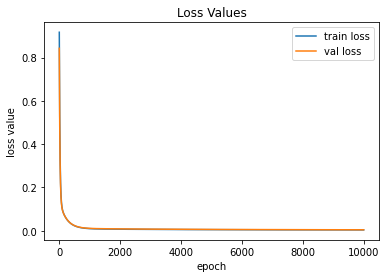

In [ ]:
edge_linear(normed_x_train, normed_y_train, normed_x_val, normed_y_val, epoch=10000, p_step=500, lr=0.001, save_model=True, gpu=True, vis=True, lambda_L=0.001)

iter,	train_loss,	val_loss
0	1.2349		1.1668
500	0.0070		0.0072
1000	0.0065		0.0066
1500	0.0063		0.0062
2000	0.0060		0.0059
2500	0.0058		0.0056
3000	0.0056		0.0054
3500	0.0054		0.0051
4000	0.0053		0.0050
4500	0.0052		0.0048
5000	0.0050		0.0047
5500	0.0049		0.0045
6000	0.0048		0.0044
6500	0.0047		0.0043
7000	0.0047		0.0042
7500	0.0046		0.0041
8000	0.0045		0.0040
8500	0.0044		0.0040
9000	0.0044		0.0039
9500	0.0043		0.0038
9999	0.0043		0.0038


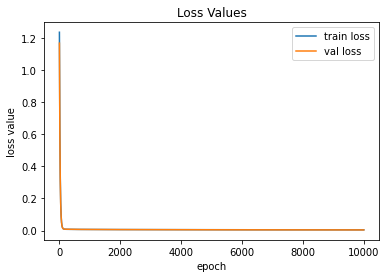

In [ ]:
lasso_linear(normed_x_train, normed_y_train, normed_x_val, normed_y_val, epoch=10000, p_step=500, lr=0.001, save_model=True, gpu=True, vis=True, lambda_L=0.001)

### Task 1 - D: Inference

We have defined, trained, and saved two models in `Task 1 - C`, as we can tell that the performance of Edge regression is better than Lasso regression. In this section, we will define a test function to calculate the MSE, RMSE, MAE based on the choosen model.

As we know the formulas of the mentioned loss functions are: 

* $MAE = \frac{1}{m}\sum_{i=1}^{m}|y_i - \hat y_i|$
* $MSE = \frac{1}{m}\sum_{i=1}^{m}(y_i - \hat y_i)^2$
* $RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_i - \hat y_i)^2}$

In PyTorch, we can define MSE by `torch.nn.MSEloss()`, define MAE by `torch.nn.L1Loss()`, according to the above foumlas, we can write RMSE manually.

In [ ]:
def test_data(model_path, x_test, y_test, visualize=False):
    """
    input the path of model, x_test, y_test, the function will print the mse, rmse, mae
    based on the loaded model
    """
    model = torch.load(model_path)
    mse_loss = torch.nn.MSELoss()
    mae_loss = torch.nn.L1Loss()
    # rmse_loss = torch.sqrt(mse_loss)
    predict = model(x_test)
    mse = mse_loss(y_test, predict)     # calculate mse
    mae = mae_loss(y_test, predict)     # calculate mae
    rmse = torch.sqrt(mse_loss(y_test, predict))    # calculate rmse

    print(f'mae:{mae.item():.4f}\tmse: {mse.item():.4f}\trmse:{rmse.item():.4f}')
    return round(mae.item(), 4), round(mse.item(), 4), round(rmse.item(), 4)

In [ ]:
test_data('./EdgeLinear.pth', normed_x_test.cuda(0), normed_y_test.cuda(0))

mae:0.0424	mse: 0.0035	rmse:0.0593


(0.0424, 0.0035, 0.0593)

By here we can see in the EdgeLiear model, the error are: 

- $MAE = 0.0431$
- $MSE = 0.0036$
- $RMSE = 0.0597$

Comparing with the MSE in trainining dataset, we can tell that the $MSE_{test}$ is not much larger than $MSE_{train}$, inversely, $MSE_{test}$ is smaller than $MSE_{train}$, therefore, we can say the generalization of the trained model is relatively eligible.

### Task 1 - E: Feature Importance

In this section, we will infer the most important features based on the given data and trained model. Our idea is that we will eliminate one of the features in the data set. Then we will run this feature eliminated feature on our trained model to check the error. Then we will count the difference between this error with the error which wasn't eliminated. The bigger difference is, the feature is more important. 

In [ ]:
def feature_eliminate(test_data, feature_num):
    """
    Feature number representation:
        0 -- Variety
        1 -- S1
        2 -- S2
        3 -- S3
        4 -- S4
        5 -- M1
        6 -- M2
        7 -- M3
        8 -- W1
        9 -- W2
        10 -- W3
        11 -- W4
    """
    new_test = deepcopy(test_data)
    new_test[..., feature_num] = 0
    return new_test

In [ ]:
# eliminate the each features

variety_x_test = feature_eliminate(normed_x_test, 0)

s1_x_test = feature_eliminate(normed_x_test, 1)
s2_x_test = feature_eliminate(normed_x_test, 2)
s3_x_test = feature_eliminate(normed_x_test, 3)
s4_x_test = feature_eliminate(normed_x_test, 4)

m1_x_test = feature_eliminate(normed_x_test, 5)
m2_x_test = feature_eliminate(normed_x_test, 6)
m3_x_test = feature_eliminate(normed_x_test, 7)

w1_x_test = feature_eliminate(normed_x_test, 8)
w2_x_test = feature_eliminate(normed_x_test, 9)
w3_x_test = feature_eliminate(normed_x_test, 10)
w4_x_test = feature_eliminate(normed_x_test, 11)

In [ ]:
# using the eliminated data, run on the trained model to count mae, mse, rmse.

original_error = test_data('./EdgeLinear.pth', normed_x_test.cuda(0), normed_y_test.cuda(0))

errors = {}
errors['Variety'] = test_data('EdgeLinear.pth', variety_x_test.cuda(0), normed_y_test.cuda(0))
errors['S_1'] = test_data('EdgeLinear.pth', s1_x_test.cuda(0), normed_y_test.cuda(0))
errors['S_2'] = test_data('EdgeLinear.pth', s2_x_test.cuda(0), normed_y_test.cuda(0))
errors['S_3'] = test_data('EdgeLinear.pth', s3_x_test.cuda(0), normed_y_test.cuda(0))
errors['S_4'] = test_data('EdgeLinear.pth', s4_x_test.cuda(0), normed_y_test.cuda(0))

errors['M_1'] = test_data('EdgeLinear.pth', m1_x_test.cuda(0), normed_y_test.cuda(0))
errors['M_2'] = test_data('EdgeLinear.pth', m2_x_test.cuda(0), normed_y_test.cuda(0))
errors['M_3'] = test_data('EdgeLinear.pth', m3_x_test.cuda(0), normed_y_test.cuda(0))

errors['W_1'] = test_data('EdgeLinear.pth', w1_x_test.cuda(0), normed_y_test.cuda(0))
errors['W_2'] = test_data('EdgeLinear.pth', w2_x_test.cuda(0), normed_y_test.cuda(0))
errors['W_3'] = test_data('EdgeLinear.pth', w3_x_test.cuda(0), normed_y_test.cuda(0))
errors['W_4'] = test_data('EdgeLinear.pth', w4_x_test.cuda(0), normed_y_test.cuda(0))

mae:0.0424	mse: 0.0035	rmse:0.0593
mae:0.0509	mse: 0.0051	rmse:0.0717
mae:0.0828	mse: 0.0086	rmse:0.0928
mae:0.0785	mse: 0.0078	rmse:0.0885
mae:0.0448	mse: 0.0035	rmse:0.0595
mae:0.0514	mse: 0.0053	rmse:0.0730
mae:0.1581	mse: 0.0275	rmse:0.1659
mae:0.0392	mse: 0.0035	rmse:0.0589
mae:0.1278	mse: 0.0189	rmse:0.1376
mae:0.0425	mse: 0.0035	rmse:0.0593
mae:0.0413	mse: 0.0038	rmse:0.0614
mae:0.0419	mse: 0.0033	rmse:0.0572
mae:0.0987	mse: 0.0132	rmse:0.1148


In [ ]:
def importance_prs(original_err, other_errors):
    """count the difference based on mae, mse, rmse"""
    importance_mae = {}
    importance_mse = {}   
    importance_rmse = {}
    for k, v in other_errors.items():
        mae_dff = round(abs(original_error[0] - v[0]), 4)
        importance_mae[k] = mae_dff

        mse_dff = round(abs(original_error[1] - v[1]), 4)
        importance_mse[k] = mse_dff

        rmse_dff = round(abs(original_error[2] - v[2]), 4)
        importance_rmse[k] = rmse_dff
    return importance_mae,importance_mse,importance_rmse

In [ ]:
importances = importance_prs(original_error, errors)

In [ ]:
def importance_evl(importances, matrix = 'mse'):
    """print the importance from unimportant to important sequence based on the pointed matrix"""
    if matrix == 'mae':
        print(sorted(importances[0].items(), key=lambda item:item[1]))
    elif matrix == 'mse':
        print(sorted(importances[1].items(), key=lambda item:item[1]))
    else:
        print(sorted(importances[2].items(), key=lambda item:item[1]))

In [ ]:
importance_evl(importances, 'mae')
importance_evl(importances, 'mse')
importance_evl(importances, 'rmse')

[('W_1', 0.0001), ('W_3', 0.0005), ('W_2', 0.0011), ('S_3', 0.0024), ('M_2', 0.0032), ('Variety', 0.0085), ('S_4', 0.009), ('S_2', 0.0361), ('S_1', 0.0404), ('W_4', 0.0563), ('M_3', 0.0854), ('M_1', 0.1157)]
[('S_3', 0.0), ('M_2', 0.0), ('W_1', 0.0), ('W_3', 0.0002), ('W_2', 0.0003), ('Variety', 0.0016), ('S_4', 0.0018), ('S_2', 0.0043), ('S_1', 0.0051), ('W_4', 0.0097), ('M_3', 0.0154), ('M_1', 0.024)]
[('W_1', 0.0), ('S_3', 0.0002), ('M_2', 0.0004), ('W_2', 0.0021), ('W_3', 0.0021), ('Variety', 0.0124), ('S_4', 0.0137), ('S_2', 0.0292), ('S_1', 0.0335), ('W_4', 0.0555), ('M_3', 0.0783), ('M_1', 0.1066)]


From above result, we can tell that to different matrix, the feature importance is different. If we choose MAE as our matrix, then the importance of data features is: 

$W_1<W_3<W_2<S_3<M_2<Variety<S_4<S_2<S_1<W_4<M_3<M_1$

If we choose MSE as our matrix, then the feature importance is: 

$S_3<M_2<W_1<W_3<W_2<Variety<S_4<S_2<S_1<W_4<M_3<M_1$

If we choose RMSE as our matrix, then the feature immportance is: 
$W_1<S_3<M_2<W_2<W_3<Variety<S_4<S_2<S_1<W_4<M_3<M_1$

Especially, we can tell no matter what matrix we choose, the most 7 important features are exactly same, as well as the sequence. The rest features have barely affection to the result so they are not important features to the data. Therefore, we can conclude that these 7 features are important for the data. The importance from high to low is $M_1 > M_3 > W_4 > S_1 > S_2 > S_4 > Variety$. 